https://machinelearningmastery.com/clustering-algorithms-with-python/

https://realpython.com/k-means-clustering-python/

https://stackoverflow.com/questions/34611038/grid-search-for-hyperparameter-evaluation-of-clustering-in-scikit-learn

https://stackoverflow.com/questions/25633383/how-can-gridsearchcv-be-used-for-clustering-meanshift-or-dbscan

https://stackoverflow.com/questions/49488313/kmeans-in-pipeline-with-gridsearchcv-scikit-learn

https://pypi.org/project/clusteval/

https://github.com/erdogant/clusteval#-quick-start

## Visualize the results on PCA-reduced data:

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py

## Selecting the number of clusters with silhouette analysis on KMeans clustering

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

A list of 10 of the more popular algorithms is as follows:

- Affinity Propagation 
- Agglomerative Clustering 
- BIRCH 
- DBSCAN 
- K-Means 
- Mini-Batch K-Means 
- Mean Shift 
- OPTICS 
- Spectral Clustering 
- Mixture of Gaussians 

In [1]:
#!pip install clusteval

In [2]:
# synthetic classification dataset
import numpy as np
from numpy import unique
from numpy import where
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
from clusteval import clusteval
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
import itertools

# Define data set

In [3]:
# set to three classes
X, y = make_classification(
    n_samples=100,
    n_classes=3,
    n_features=3,
    n_informative=3,
    n_redundant=0,
    n_clusters_per_class=2,
    random_state=7
)

In [4]:
#X[0]

In [5]:
pd.DataFrame(X)[0]

0    -0.453212
1     1.403244
2     0.091542
3    -1.293537
4     0.752694
        ...   
95   -2.662690
96   -0.648435
97    0.530748
98   -1.555142
99   -1.768577
Name: 0, Length: 100, dtype: float64

In [6]:
y

array([2, 1, 1, 0, 2, 0, 0, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 0, 2, 2, 0,
       1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 1, 2, 2, 1, 2,
       0, 2, 2, 0, 1, 1, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 0, 1,
       0, 2, 0, 2, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 1])

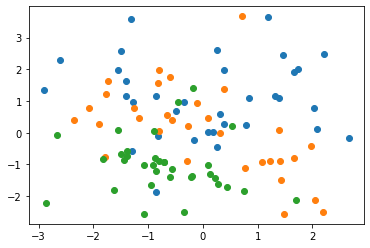

In [7]:
# create scatter plot for samples from each class
for class_value in range(3):
    # get row indexes for samples with this class
    row_ix = where(y == class_value)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

# show the plot
pyplot.show()

In [8]:
#X[0]

In [9]:
graph = go.Scatter3d(
    x= pd.DataFrame(X)[0],
    y= pd.DataFrame(X)[1],
    z= pd.DataFrame(X)[2],
    mode='markers',
    marker=dict(
        color = y, 
        size= 4,
        line=dict(
            color= y,
            width= 12
        ),
        opacity=0.9
    )
)
data = [graph]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
        xaxis = dict(title  = 'V1'),
        yaxis = dict(title  = 'V2'),
        zaxis = dict(title  = 'V3')
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

# MODULE clusteval

In [10]:
methods = [
    'silhouette',
    'dbindex',
    'derivative'
]

In [11]:
clusters =[
    'agglomerative',
#     'kmeans',
#     'dbscan'
#     'hdbscan',
#     'optics'
]

In [12]:
linkages = [
    'ward',
    'complete',
#     'average',
#     'single',
#     'weighted',
    'centroid',
#     'median'
]

In [13]:
metrics = [
    'euclidean',
#    'braycurtis',
#    'canberra',
#     'chebyshev',
#    'correlation',
#    'dice',
#    'hamming',
#    'jaccard',
#    'kulsinski',
#    'mahalanobis',
#    'minkowski'
#    'rogerstanimoto',
#    'russellrao',
#    'seuclidean',
#    'sokalmichener',
#    'sokalsneath',
#    'sqeuclidean',
#    'yule'
]

# Explore possible number of clusters

In [14]:
for method, cluster, linkage, metric in itertools.product(methods, clusters, linkages, metrics):
    print('{} {} {} {}'.format(method, cluster, linkage, metric))

silhouette agglomerative ward euclidean
silhouette agglomerative complete euclidean
silhouette agglomerative centroid euclidean
dbindex agglomerative ward euclidean
dbindex agglomerative complete euclidean
dbindex agglomerative centroid euclidean
derivative agglomerative ward euclidean
derivative agglomerative complete euclidean
derivative agglomerative centroid euclidean



[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 23/23 [00:00<00:00, 793.02it/s]

[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [21].
[clusteval] >Fin.


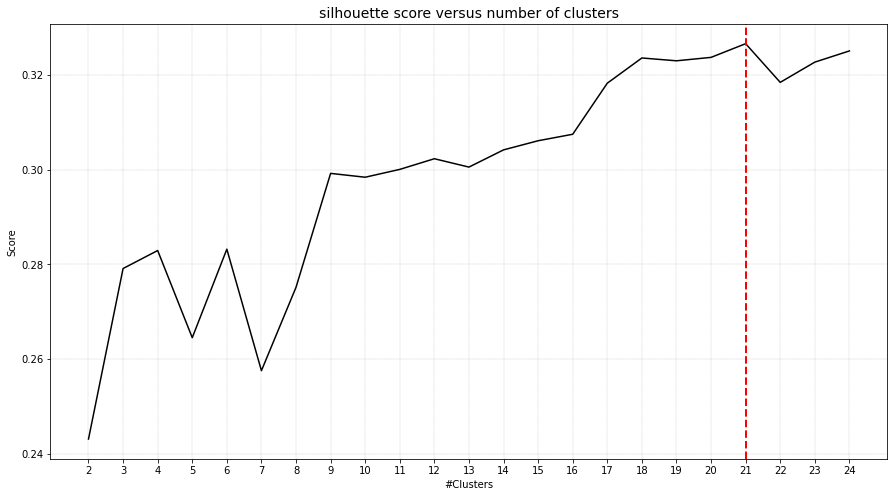

[clusteval] >Plotting the dendrogram with optimized settings: metric=euclidean, linkage=ward, max_d=5.182. Be patient now..
[clusteval] >Compute cluster labels.
[clusteval] >Estimated number of n_clusters: 21, average silhouette_score=0.327



[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: complete
[clusteval] >Evaluate using silhouette.


100%|██████████| 23/23 [00:00<00:00, 766.72it/s]

[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [24].
[clusteval] >Fin.


[clusteval] >Plotting the dendrogram with optimized settings: metric=euclidean, linkage=complete, max_d=4.132. Be patient now..
[clusteval] >Compute cluster labels.
[clusteval] >Estimated number of n_clusters: 24, average silhouette_score=0.319



[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: centroid
[clusteval] >Evaluate using silhouette.


100%|██████████| 23/23 [00:00<00:00, 793.12it/s]

[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [23].
[clusteval] >Fin.


[clusteval] >Plotting the dendrogram with optimized settings: metric=euclidean, linkage=centroid, max_d=3.173. Be patient now..
[clusteval] >Compute cluster labels.
[clusteval] >Estimated number of n_clusters: 23, average silhouette_score=0.308


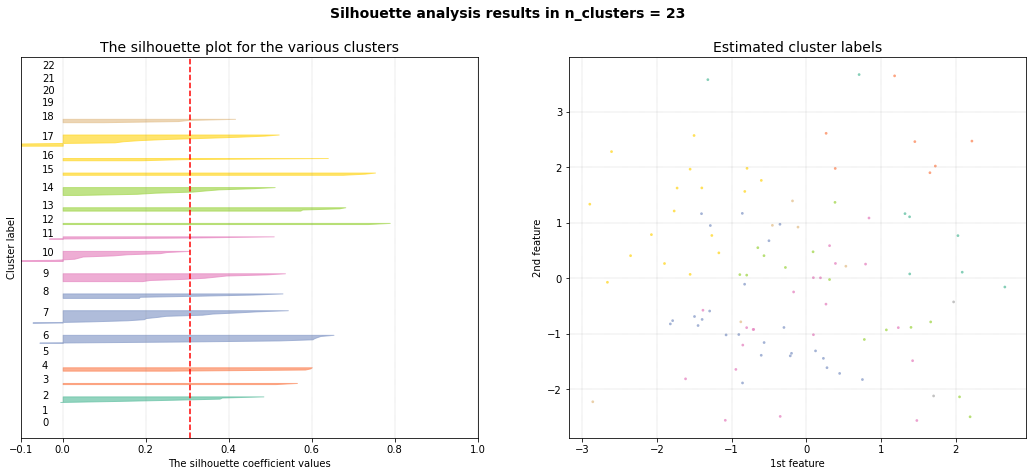


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using dbindex.


100%|██████████| 23/23 [00:00<00:00, 302.64it/s]

[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [23].
[clusteval] >Fin.


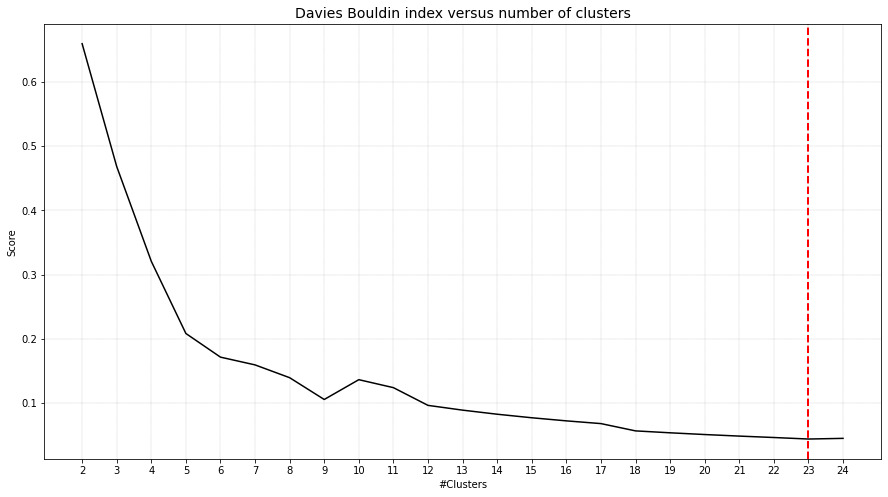

[clusteval] >Plotting the dendrogram with optimized settings: metric=euclidean, linkage=ward, max_d=3.691. Be patient now..
[clusteval] >Compute cluster labels.
[clusteval] >Estimated number of n_clusters: 23, average silhouette_score=0.323



[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: complete
[clusteval] >Evaluate using dbindex.


100%|██████████| 23/23 [00:00<00:00, 315.08it/s]

[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [24].
[clusteval] >Fin.


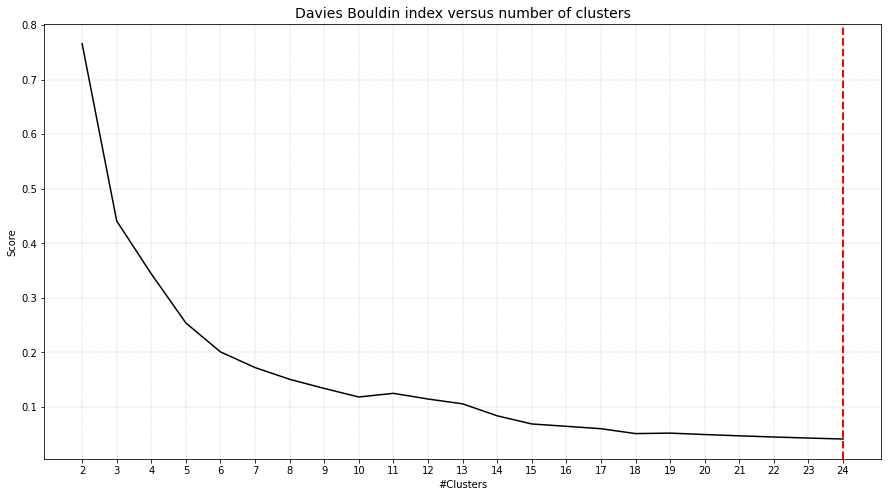

[clusteval] >Plotting the dendrogram with optimized settings: metric=euclidean, linkage=complete, max_d=4.132. Be patient now..
[clusteval] >Compute cluster labels.
[clusteval] >Estimated number of n_clusters: 24, average silhouette_score=0.319



[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: centroid
[clusteval] >Evaluate using dbindex.


100%|██████████| 23/23 [00:00<00:00, 298.71it/s]

[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [24].
[clusteval] >Fin.


[clusteval] >Plotting the dendrogram with optimized settings: metric=euclidean, linkage=centroid, max_d=3.173. Be patient now..
[clusteval] >Compute cluster labels.
[clusteval] >Estimated number of n_clusters: 24, average silhouette_score=0.296


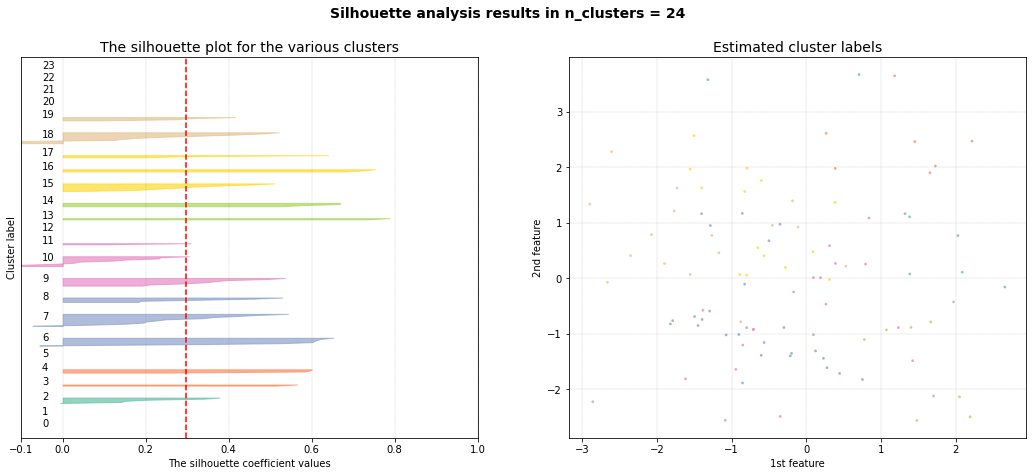


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using derivatives.
[clusteval] >Determining optimal clustering by derivatives..
[clusteval] >Clusters: 5
[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [5].
[clusteval] >Fin.


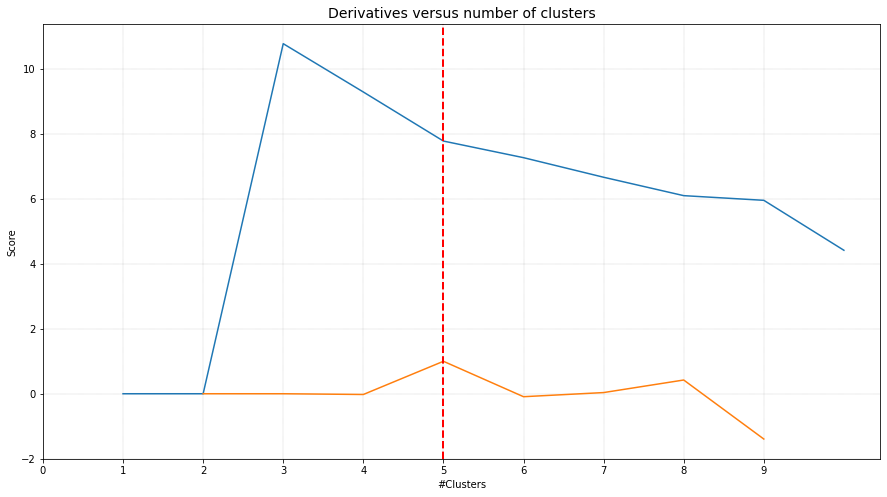

[clusteval] >Plotting the dendrogram with optimized settings: metric=euclidean, linkage=ward, max_d=8.528. Be patient now..
[clusteval] >Compute cluster labels.
[clusteval] >Estimated number of n_clusters: 5, average silhouette_score=0.265


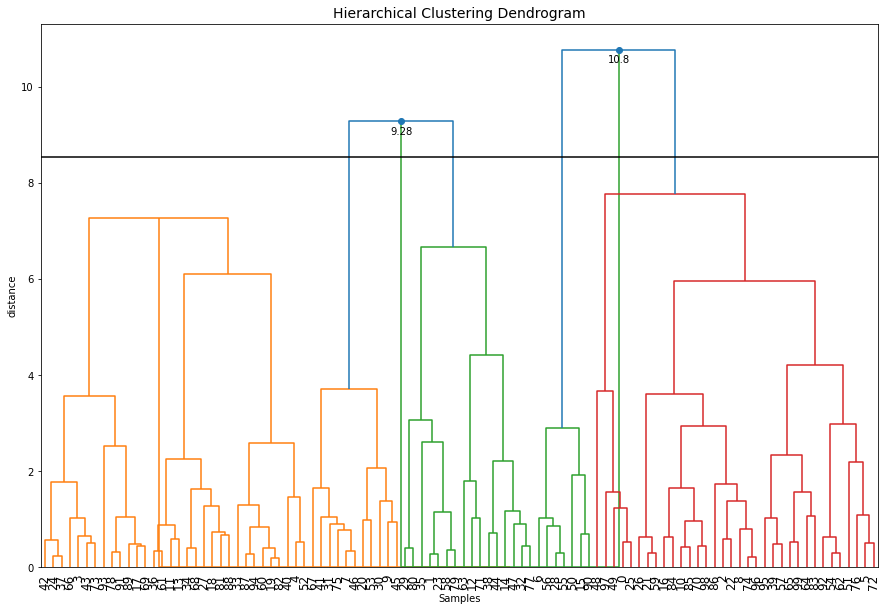

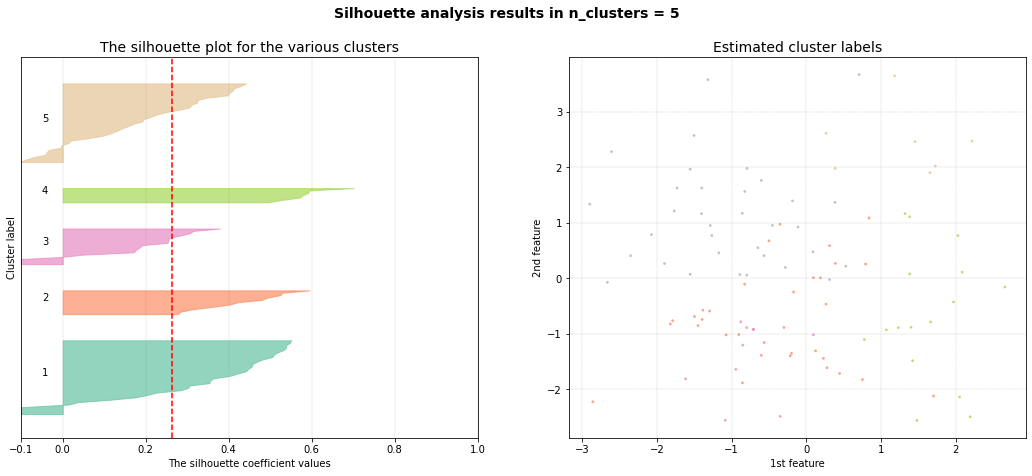


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: complete
[clusteval] >Evaluate using derivatives.
[clusteval] >Determining optimal clustering by derivatives..
[clusteval] >Clusters: 6
[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [6].
[clusteval] >Fin.


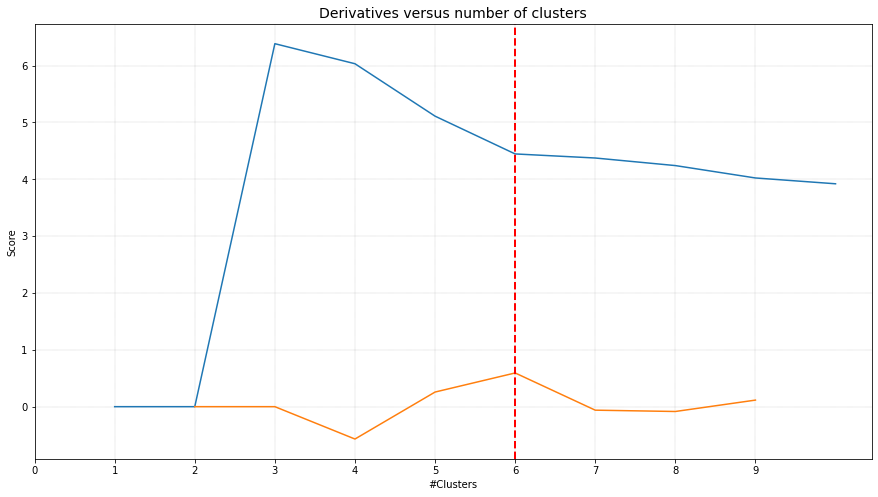

[clusteval] >Plotting the dendrogram with optimized settings: metric=euclidean, linkage=complete, max_d=4.778. Be patient now..
[clusteval] >Compute cluster labels.
[clusteval] >Estimated number of n_clusters: 6, average silhouette_score=0.236


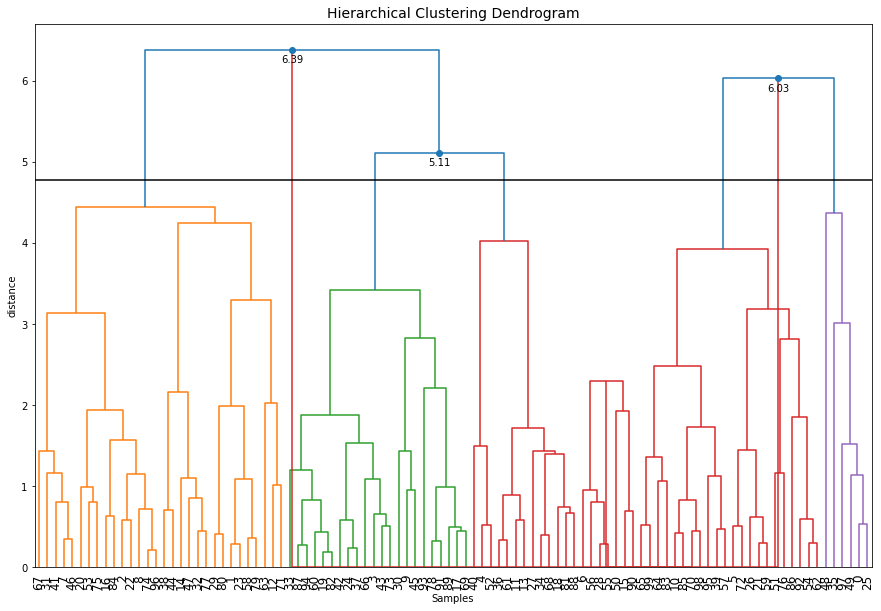

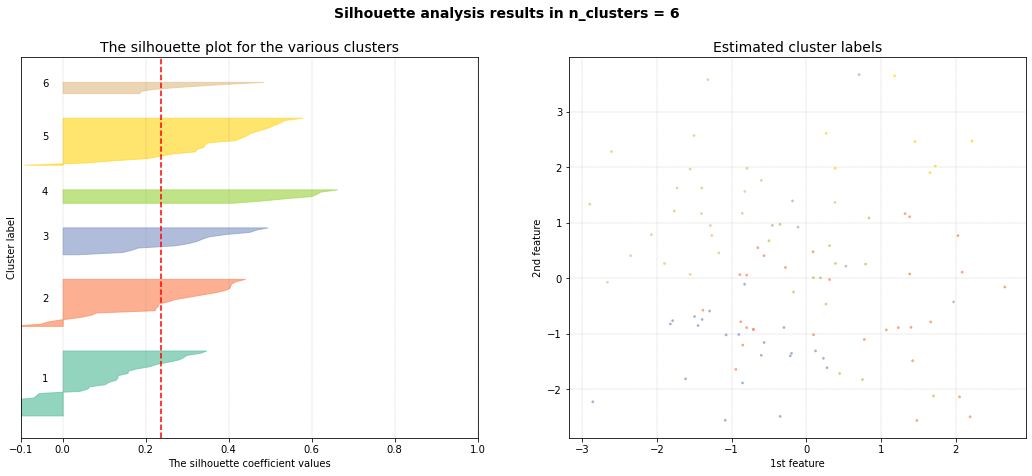


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: centroid
[clusteval] >Evaluate using derivatives.
[clusteval] >Determining optimal clustering by derivatives..
[clusteval] >Clusters: 5
[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [5].
[clusteval] >Fin.


[clusteval] >Plotting the dendrogram with optimized settings: metric=euclidean, linkage=centroid, max_d=3.173. Be patient now..
[clusteval] >Compute cluster labels.
[clusteval] >Estimated number of n_clusters: 5, average silhouette_score=-0.040


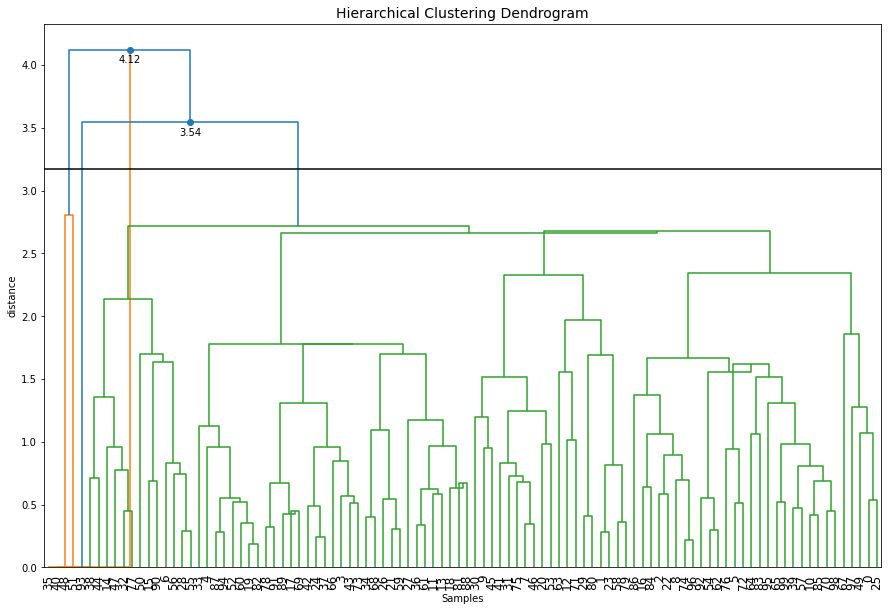

In [15]:
for method, cluster, linkage, metric in itertools.product(methods, clusters, linkages, metrics):
    ce = clusteval(
        cluster=cluster,
        method=method,
        metric=metric,
        linkage=linkage,
        min_clust=2,
        max_clust=25,
        savemem=False,
        verbose=3,
    )
    
    ce.fit(X)
    ce.plot()
    ce.dendrogram()
    ce.scatter(X)

# AffinityPropagation

In [16]:
# define the model, default values
model = AffinityPropagation(
    damping=0.5,
    max_iter=200,
    convergence_iter=15,
    copy=True,
    preference=None,
    affinity='euclidean',
    verbose=False,
    random_state=None)

# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)

# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [17]:
unique(yhat)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [18]:
graph = go.Scatter3d(
    x= pd.DataFrame(X)[0],
    y= pd.DataFrame(X)[1],
    z= pd.DataFrame(X)[2],
    mode='markers',
    marker=dict(
        color = yhat, 
        size= 4,
        line=dict(
            color= yhat,
            width= 12
        ),
        opacity=0.9
    )
)
data = [graph]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
        xaxis = dict(title  = 'V1'),
        yaxis = dict(title  = 'V2'),
        zaxis = dict(title  = 'V3')
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [19]:
#model.cluster_centers_indices_

In [20]:
#model.cluster_centers_

In [21]:
#model.labels_

# AgglomerativeClustering

In [22]:
affinities = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']

In [23]:
linkages = ['ward', 'complete', 'average', 'single']

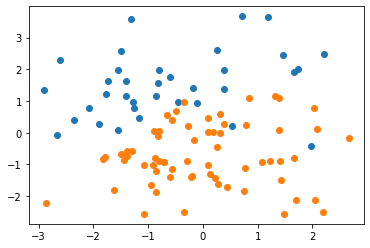

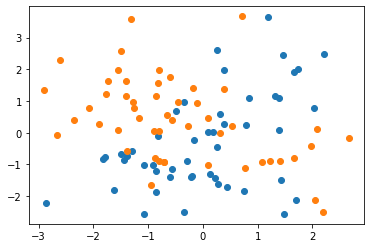

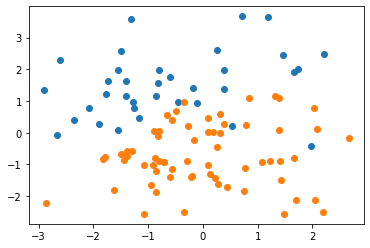

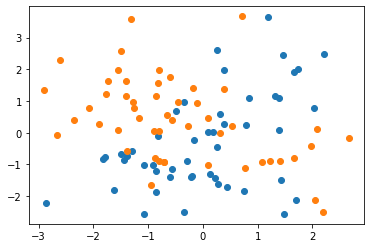

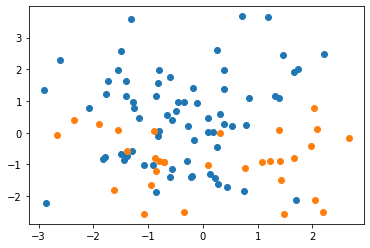

In [24]:
for affinity in affinities:
    # define the model, default values
    model = AgglomerativeClustering(
        n_clusters=2,
        affinity=affinity,
        memory=None,
        connectivity=None,
        compute_full_tree='auto',
        linkage='complete',
        distance_threshold=None,
        compute_distances=False,
    )

    # fit model and predict clusters
    yhat = model.fit_predict(X)
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    for cluster in clusters:
        # get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)
        # create scatter of these samples
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    # show the plot
    pyplot.show()

In [25]:
graph = go.Scatter3d(
    x= pd.DataFrame(X)[0],
    y= pd.DataFrame(X)[1],
    z= pd.DataFrame(X)[2],
    mode='markers',
    marker=dict(
        color = yhat, 
        size= 4,
        line=dict(
            color= yhat,
            width= 12
        ),
        opacity=0.9
    )
)
data = [graph]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
        xaxis = dict(title  = 'V1'),
        yaxis = dict(title  = 'V2'),
        zaxis = dict(title  = 'V3')
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

# Birch

In [26]:
thresholds =  np.arange(0, 1, 0.1)
thresholds

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

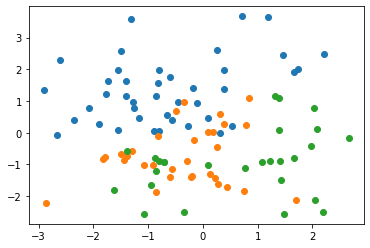

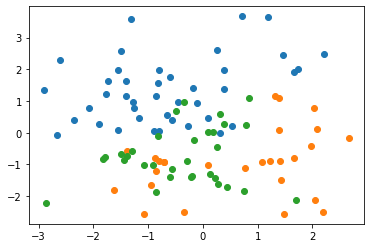

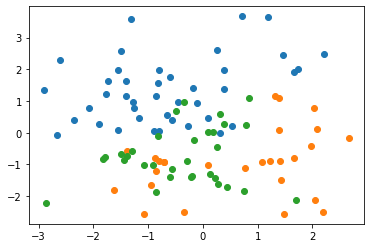

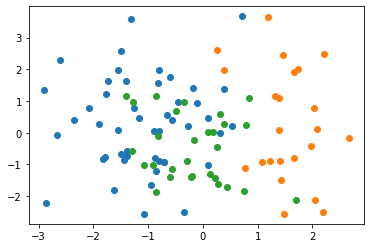

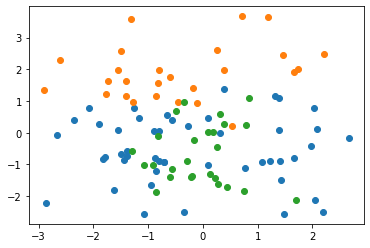

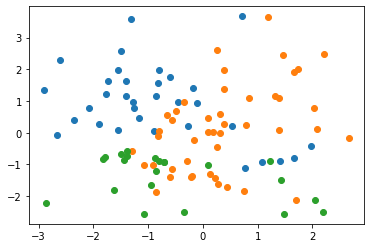

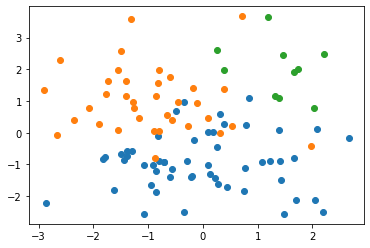

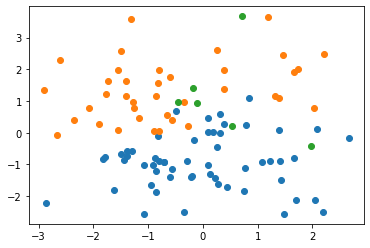

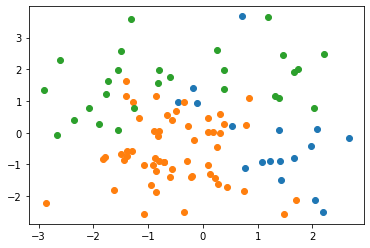

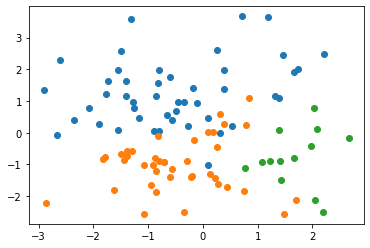

In [27]:
for threshold in thresholds:
    # define the model, default values
    model = Birch(
        threshold=threshold,
        branching_factor=50,
        n_clusters=3,
        compute_labels=True,
        copy=True
    )

    # fit the model
    model.fit(X)
    # assign a cluster to each example
    yhat = model.predict(X)
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    for cluster in clusters:
        # get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)
        # create scatter of these samples
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    # show the plot
    pyplot.show()

In [28]:
graph = go.Scatter3d(
    x= pd.DataFrame(X)[0],
    y= pd.DataFrame(X)[1],
    z= pd.DataFrame(X)[2],
    mode='markers',
    marker=dict(
        color = yhat, 
        size= 4,
        line=dict(
            color= yhat,
            width= 12
        ),
        opacity=0.9
    )
)
data = [graph]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
        xaxis = dict(title  = 'V1'),
        yaxis = dict(title  = 'V2'),
        zaxis = dict(title  = 'V3')
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

# DBSCAN

In [29]:
metrics = ['braycurtis',
           'canberra',
           'chebyshev',
           'correlation',
           'dice',
           'hamming',
           'jaccard',
           'kulsinski',
#            'mahalanobis',
#            'minkowski',
           'rogerstanimoto',
           'russellrao',
#            'seuclidean',
           'sokalmichener',
           'sokalsneath',
           'sqeuclidean',
#            'yule'
          ]

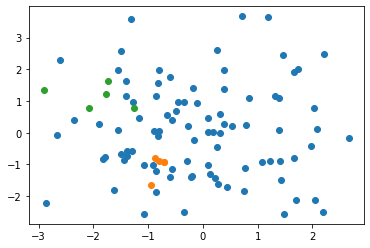

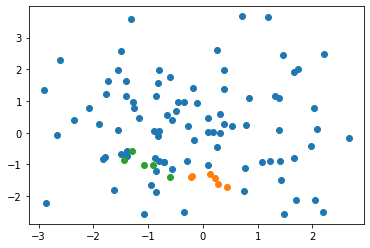

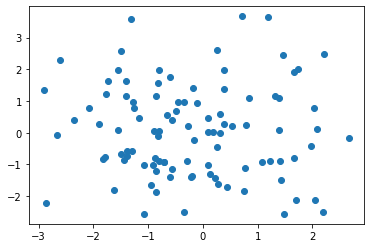

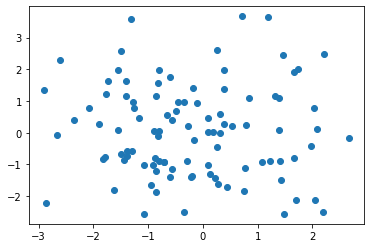

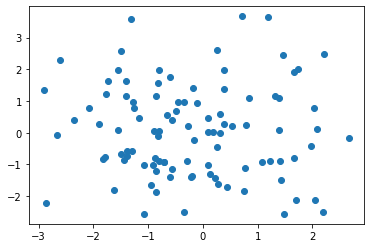

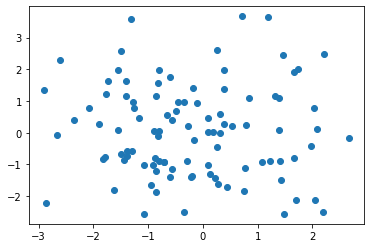

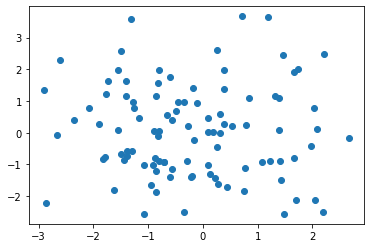

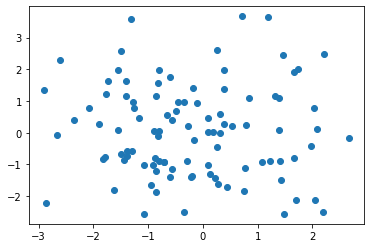

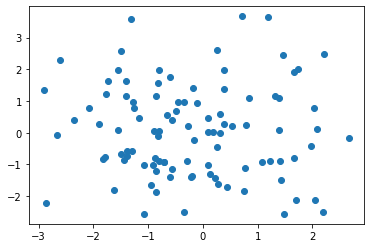

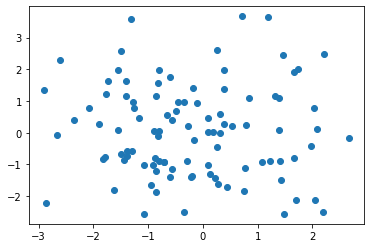

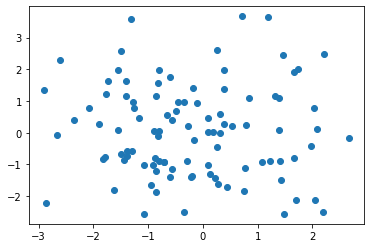

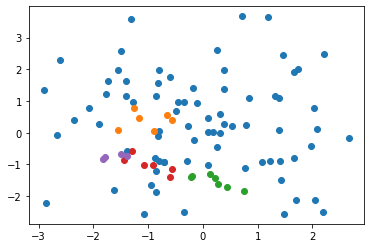

In [30]:
for metric in metrics:
    # define the model, default values
    #model = DBSCAN(eps=0.30, min_samples=9)
    model = DBSCAN(
        eps=0.5,
        min_samples=5,
        metric=metric,
        algorithm='auto',
        leaf_size=30,
        p=None,
        n_jobs=None,
    )

    # fit model and predict clusters
    yhat = model.fit_predict(X)
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    for cluster in clusters:
        # get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)
        # create scatter of these samples
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    # show the plot
    pyplot.show()

In [31]:
graph = go.Scatter3d(
    x= pd.DataFrame(X)[0],
    y= pd.DataFrame(X)[1],
    z= pd.DataFrame(X)[2],
    mode='markers',
    marker=dict(
        color = yhat, 
        size= 4,
        line=dict(
            color= yhat,
            width= 12
        ),
        opacity=0.9
    )
)
data = [graph]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
        xaxis = dict(title  = 'V1'),
        yaxis = dict(title  = 'V2'),
        zaxis = dict(title  = 'V3')
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

# KMeans

In [32]:
algorithms = ['auto', 'full', 'elkan']

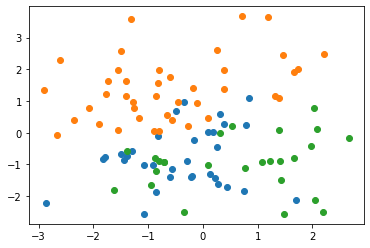

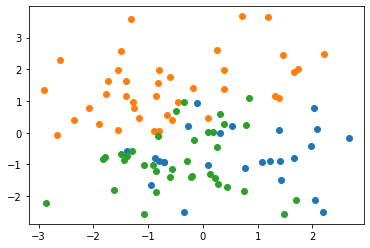

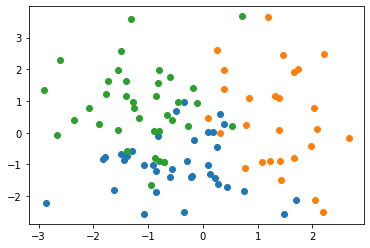

In [33]:
for alorithm in algorithms:
    model = KMeans(
        n_clusters=3,
        init='k-means++',
        n_init=10,
        max_iter=300,
        tol=0.0001,
        verbose=0,
        random_state=None,
        copy_x=True,
        algorithm='auto',
    )

    # fit the model
    model.fit(X)
    # assign a cluster to each example
    yhat = model.predict(X)
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    for cluster in clusters:
        # get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)
        # create scatter of these samples
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    # show the plot
    pyplot.show()

In [34]:
graph = go.Scatter3d(
    x= pd.DataFrame(X)[0],
    y= pd.DataFrame(X)[1],
    z= pd.DataFrame(X)[2],
    mode='markers',
    marker=dict(
        color = yhat, 
        size= 4,
        line=dict(
            color= yhat,
            width= 12
        ),
        opacity=0.9
    )
)
data = [graph]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
        xaxis = dict(title  = 'V1'),
        yaxis = dict(title  = 'V2'),
        zaxis = dict(title  = 'V3')
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

# MiniBatchKMeans

In [35]:
inits = ['k-means++', 'random']

C:\Users\KonuTech\.conda\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1046: UserWarning:

MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=1



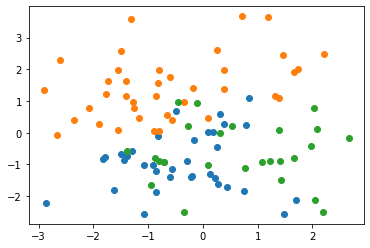

C:\Users\KonuTech\.conda\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1046: UserWarning:

MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=1



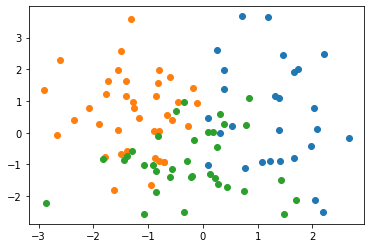

In [36]:
for init in inits:
    # define the model, default values
    model = MiniBatchKMeans(
        n_clusters=3,
        init='k-means++',
        max_iter=100,
        batch_size=1024,
        verbose=0,
        compute_labels=True,
        random_state=None,
        tol=0.0,
        max_no_improvement=10,
        init_size=None,
        n_init=3,
        reassignment_ratio=0.01,
    )

    # fit the model
    model.fit(X)
    # assign a cluster to each example
    yhat = model.predict(X)
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    for cluster in clusters:
        # get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)
        # create scatter of these samples
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    # show the plot
    pyplot.show()

In [37]:
graph = go.Scatter3d(
    x= pd.DataFrame(X)[0],
    y= pd.DataFrame(X)[1],
    z= pd.DataFrame(X)[2],
    mode='markers',
    marker=dict(
        color = yhat, 
        size= 4,
        line=dict(
            color= yhat,
            width= 12
        ),
        opacity=0.9
    )
)
data = [graph]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
        xaxis = dict(title  = 'V1'),
        yaxis = dict(title  = 'V2'),
        zaxis = dict(title  = 'V3')
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

# MeanShift

In [38]:
bandwidths = np.arange(1, 3, 1)
bandwidths

array([1, 2])

In [39]:
for bandwith in bandwidths:
    # define the model, default values
    model = MeanShift(
        bandwidth=bandwith,
        seeds=None,
        bin_seeding=False,
        min_bin_freq=1,
        cluster_all=True,
        n_jobs=None,
        max_iter=300,
    )

    # fit model and predict clusters
    yhat = model.fit_predict(X)
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    for cluster in clusters:
        # get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)
        # create scatter of these samples
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    # show the plot
    pyplot.show()

In [40]:
graph = go.Scatter3d(
    x= pd.DataFrame(X)[0],
    y= pd.DataFrame(X)[1],
    z= pd.DataFrame(X)[2],
    mode='markers',
    marker=dict(
        color = yhat, 
        size= 4,
        line=dict(
            color= yhat,
            width= 12
        ),
        opacity=0.9
    )
)
data = [graph]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
        xaxis = dict(title  = 'V1'),
        yaxis = dict(title  = 'V2'),
        zaxis = dict(title  = 'V3')
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

# OPTICS

In [41]:
metrics = ['braycurtis',
           'canberra',
           'chebyshev',
           'correlation',
           'dice',
           'hamming',
           'jaccard',
           'kulsinski',
#            'mahalanobis',
#            'minkowski',
           'rogerstanimoto',
           'russellrao',
#            'seuclidean',
           'sokalmichener',
           'sokalsneath',
           'sqeuclidean',
#            'yule'
          ]

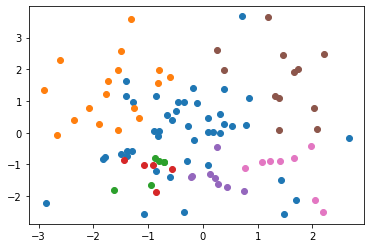

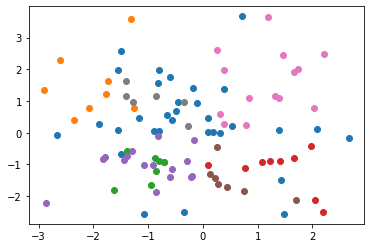

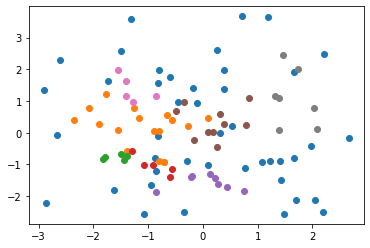

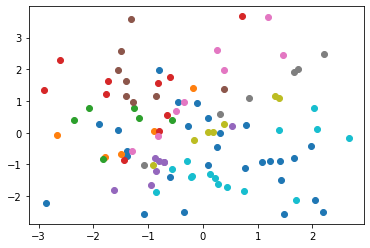

C:\Users\KonuTech\.conda\envs\tf-gpu\lib\site-packages\sklearn\cluster\_optics.py:286: DataConversionWarning:

Data will be converted to boolean for metric dice, to avoid this warning, you may convert the data prior to calling fit.



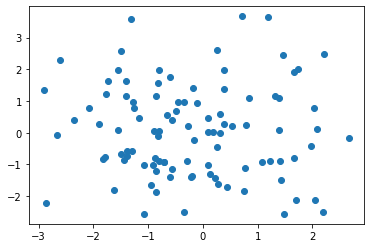

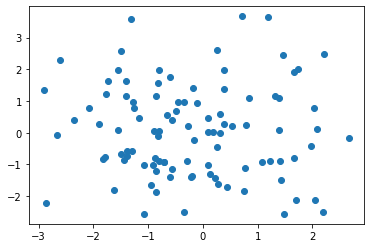

C:\Users\KonuTech\.conda\envs\tf-gpu\lib\site-packages\sklearn\cluster\_optics.py:286: DataConversionWarning:

Data will be converted to boolean for metric jaccard, to avoid this warning, you may convert the data prior to calling fit.



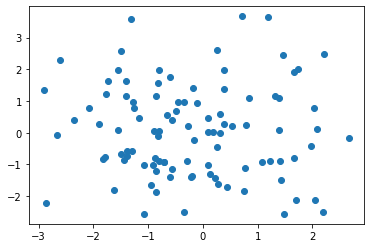

C:\Users\KonuTech\.conda\envs\tf-gpu\lib\site-packages\sklearn\cluster\_optics.py:286: DataConversionWarning:

Data will be converted to boolean for metric kulsinski, to avoid this warning, you may convert the data prior to calling fit.



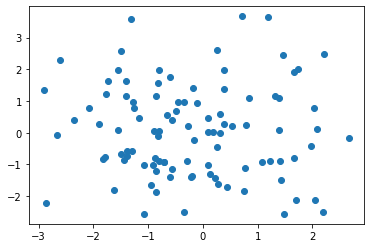

C:\Users\KonuTech\.conda\envs\tf-gpu\lib\site-packages\sklearn\cluster\_optics.py:286: DataConversionWarning:

Data will be converted to boolean for metric rogerstanimoto, to avoid this warning, you may convert the data prior to calling fit.



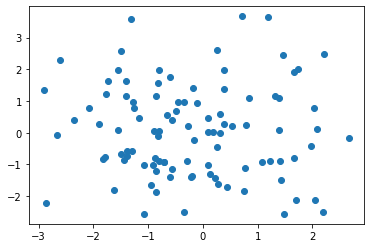

C:\Users\KonuTech\.conda\envs\tf-gpu\lib\site-packages\sklearn\cluster\_optics.py:286: DataConversionWarning:

Data will be converted to boolean for metric russellrao, to avoid this warning, you may convert the data prior to calling fit.



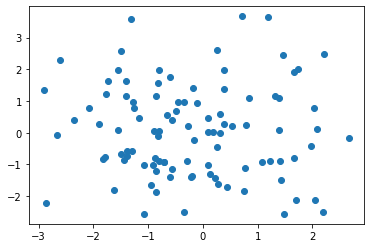

C:\Users\KonuTech\.conda\envs\tf-gpu\lib\site-packages\sklearn\cluster\_optics.py:286: DataConversionWarning:

Data will be converted to boolean for metric sokalmichener, to avoid this warning, you may convert the data prior to calling fit.



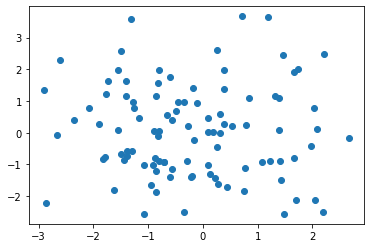

C:\Users\KonuTech\.conda\envs\tf-gpu\lib\site-packages\sklearn\cluster\_optics.py:286: DataConversionWarning:

Data will be converted to boolean for metric sokalsneath, to avoid this warning, you may convert the data prior to calling fit.



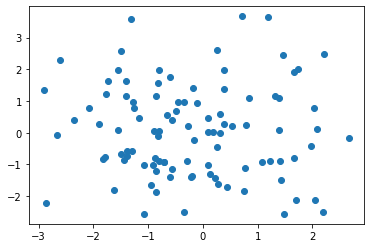

In [42]:
for metric in metrics:
    # define the model, default values
    model = OPTICS(
        min_samples=5,
        max_eps=np.inf,
        metric=metric,
        p=2,
        metric_params=None,
        cluster_method='xi',
        eps=None,
        xi=0.05,
        predecessor_correction=True,
        min_cluster_size=None,
        algorithm='auto',
        leaf_size=30,
        memory=None,
        n_jobs=None,
    )

    # fit model and predict clusters
    yhat = model.fit_predict(X)
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    for cluster in clusters:
        # get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)
        # create scatter of these samples
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    # show the plot
    pyplot.show()

In [43]:
graph = go.Scatter3d(
    x= pd.DataFrame(X)[0],
    y= pd.DataFrame(X)[1],
    z= pd.DataFrame(X)[2],
    mode='markers',
    marker=dict(
        color = yhat, 
        size= 4,
        line=dict(
            color= yhat,
            width= 12
        ),
        opacity=0.9
    )
)
data = [graph]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
        xaxis = dict(title  = 'V1'),
        yaxis = dict(title  = 'V2'),
        zaxis = dict(title  = 'V3')
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

# SpectralClustering

In [44]:
affinities = ['nearest_neighbors', 'rbf', 'precomputed', 'precomputed_nearest_neighbors']

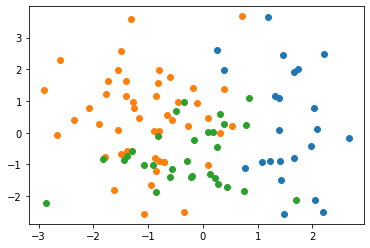

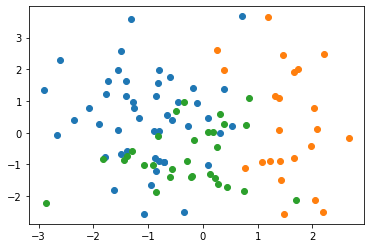

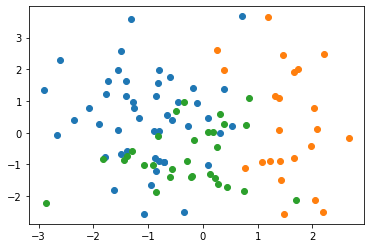

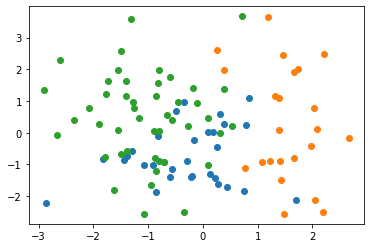

In [45]:
for affinity in affinities:
    # define the model, default values
    model = SpectralClustering(
        n_clusters=3,
        eigen_solver=None,
        n_components=None,
        random_state=None,
        n_init=10,
        gamma=1.0,
        affinity='rbf',
        n_neighbors=10,
        eigen_tol=0.0,
        assign_labels='kmeans',
        degree=3,
        coef0=1,
        kernel_params=None,
        n_jobs=None,
        verbose=False,
    )

    # fit model and predict clusters
    yhat = model.fit_predict(X)
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    for cluster in clusters:
        # get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)
        # create scatter of these samples
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    # show the plot
    pyplot.show()

In [46]:
graph = go.Scatter3d(
    x= pd.DataFrame(X)[0],
    y= pd.DataFrame(X)[1],
    z= pd.DataFrame(X)[2],
    mode='markers',
    marker=dict(
        color = yhat, 
        size= 4,
        line=dict(
            color= yhat,
            width= 12
        ),
        opacity=0.9
    )
)
data = [graph]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
        xaxis = dict(title  = 'V1'),
        yaxis = dict(title  = 'V2'),
        zaxis = dict(title  = 'V3')
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

# GaussianMixture

In [47]:
init_params = ['kmeans', 'random']

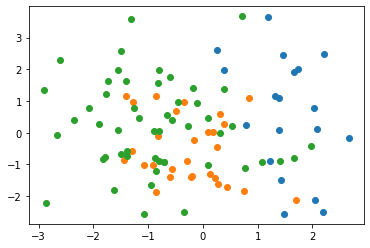

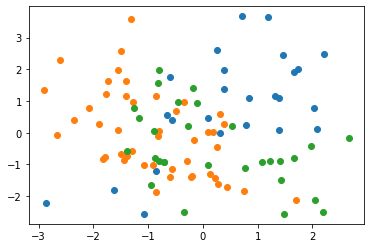

In [48]:
for init_param in init_params:
    # define the model, default values
    model = GaussianMixture(
        n_components=3,
        covariance_type='full',
        tol=0.001,
        reg_covar=1e-06,
        max_iter=100,
        n_init=1,
        init_params=init_param,
        weights_init=None,
        means_init=None,
        precisions_init=None,
        random_state=None,
        warm_start=False,
        verbose=0,
        verbose_interval=10,
    )

    # fit the model
    model.fit(X)
    # assign a cluster to each example
    yhat = model.predict(X)
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    for cluster in clusters:
        # get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)
        # create scatter of these samples
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    # show the plot
    pyplot.show()

In [49]:
graph = go.Scatter3d(
    x= pd.DataFrame(X)[0],
    y= pd.DataFrame(X)[1],
    z= pd.DataFrame(X)[2],
    mode='markers',
    marker=dict(
        color = yhat, 
        size= 4,
        line=dict(
            color= yhat,
            width= 12
        ),
        opacity=0.9
    )
)
data = [graph]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
        xaxis = dict(title  = 'V1'),
        yaxis = dict(title  = 'V2'),
        zaxis = dict(title  = 'V3')
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)